In [41]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import numpy as np
import json
import pandas as pd
import datetime 
from datetime import datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import pyplot as plt

In [42]:
def printPieChart(label_list, data_list):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    ax.pie(data_list, labels = label_list,autopct='%1.2f%%')
    plt.show()

# Descriptive statistics

In [43]:
df = pd.read_json(r'data/data2/400gbJson.json')

In [44]:
df.head()

,name,aliases,genres,description,type,release_date
0,Jail Breakers,[Dasso yugi@en],"[Action Film, Crime Fiction Film]",[Jail Breakers is a crime fiction film directe...,"[commontopic, film.film]",1976-06-19
1,Kvelden er din,[None],[None],[None],"[common.topic, tv.tv_program]",2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,[None],[None],[Grandeur et decadence dun petit commerce de C...,"[common.topic, film.film]",1986
3,The Doors: Live in Europe (1968),[None],"[Music Film, Documentary Film]",[None],"[common.topic, film.film, media_common.netflix...",1991
4,Smert Tairova,[None],[None],[Smert Tairova is a 2003 film directed by Bori...,"[award.award_nominated_work, award.award_winni...",2003


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339674 entries, 0 to 339673
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          339674 non-null  object
 1   aliases       339674 non-null  object
 2   genres        339674 non-null  object
 3   description   339674 non-null  object
 4   type          339674 non-null  object
 5   release_date  339674 non-null  object
dtypes: object(6)
memory usage: 15.5+ MB


Num of records:

In [46]:
len(df)

339674

In [47]:
df.head()

,name,aliases,genres,description,type,release_date
0,Jail Breakers,[Dasso yugi@en],"[Action Film, Crime Fiction Film]",[Jail Breakers is a crime fiction film directe...,"[commontopic, film.film]",1976-06-19
1,Kvelden er din,[None],[None],[None],"[common.topic, tv.tv_program]",2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,[None],[None],[Grandeur et decadence dun petit commerce de C...,"[common.topic, film.film]",1986
3,The Doors: Live in Europe (1968),[None],"[Music Film, Documentary Film]",[None],"[common.topic, film.film, media_common.netflix...",1991
4,Smert Tairova,[None],[None],[Smert Tairova is a 2003 film directed by Bori...,"[award.award_nominated_work, award.award_winni...",2003


### aliases

In [48]:
aliases = df.loc[:, ['name','aliases','release_date']]

In [49]:
num_of_all_aliases = len(aliases)

In [50]:
aliases.head(15)

,name,aliases,release_date
0,Jail Breakers,[Dasso yugi@en],1976-06-19
1,Kvelden er din,[None],2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,[None],1986
3,The Doors: Live in Europe (1968),[None],1991
4,Smert Tairova,[None],2003
5,Claire,[None],None
6,The Devilish Plank,[None],None
7,Op de Hollandse Toer,[None],1973
8,Le papillon fantastique,[None],1909
9,Mamushi to aodaishô,[None],1975-03-08


Num of maximum aliases:

In [51]:
max_aliases = aliases.loc[:,'aliases'].apply(lambda x: len(x))

In [52]:
max_aliases.head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    3
11    1
12    1
13    1
14    1
Name: aliases, dtype: int64

Index of record with max aliases:

In [53]:
max_index_aliases = max_aliases[max_aliases == max_aliases.max()].index

In [54]:
max_index_aliases

Int64Index([223198], dtype='int64')

In [55]:
aliases.iloc[max_index_aliases]

,name,aliases,release_date
223198,Star Wars,"[A Guerra das Estrelas@en, ANH@en, Adventures ...",1977


In [56]:
max_aliases.max()

66

In [57]:
aliases = aliases.explode('aliases')

In [58]:
aliases.head(16)

,name,aliases,release_date
0,Jail Breakers,Dasso yugi@en,1976-06-19
1,Kvelden er din,None,2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,None,1986
3,The Doors: Live in Europe (1968),None,1991
4,Smert Tairova,None,2003
5,Claire,None,None
6,The Devilish Plank,None,None
7,Op de Hollandse Toer,None,1973
8,Le papillon fantastique,None,1909
9,Mamushi to aodaishô,None,1975-03-08


In [59]:
num_of_none_aliases = len(aliases[aliases['aliases'] == "None"])

Num of records with alias:

In [60]:
num_of_all_aliases-num_of_none_aliases

86198

Num of records with None aliases: 

In [61]:
num_of_none_aliases

253476

In [62]:
percentage_of_none_aliases = (num_of_all/100)*num_of_none_aliases

In [63]:
percentage_of_complete_aliases = (num_of_all_aliases/100)*(num_of_all-num_of_none_aliases) 

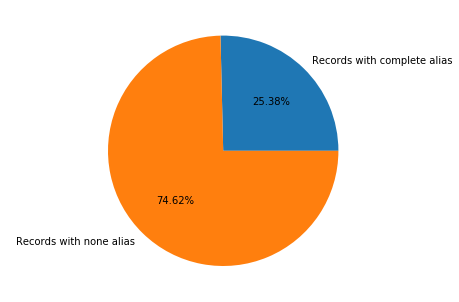

In [65]:
printPieChart(['Records with complete alias', 'Records with none alias'],
              [percentage_of_complete_aliases, percentage_of_none_aliases])

### genres

In [70]:
genres = df.loc[:, ['name','genres','release_date']]

In [71]:
genres

,name,genres,release_date
0,Jail Breakers,"[Action Film, Crime Fiction Film]",1976-06-19
1,Kvelden er din,[None],2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,[None],1986
3,The Doors: Live in Europe (1968),"[Music Film, Documentary Film]",1991
4,Smert Tairova,[None],2003
...,...,...,...
339669,It's Not About the Shawerma,[None],None
339670,Ambrose's Lofty Perch,[None],None
339671,The Enchanted Spectacles,[None],None
339672,Mounting Tension,[None],None


In [72]:
num_of_all_genres = len(genres)

In [73]:
max_genres = genres.loc[:,'genres'].apply(lambda x: len(x))

In [74]:
max_genres.head(15)

0     2
1     1
2     1
3     2
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
Name: genres, dtype: int64

In [75]:
max_genres = genres.apply(lambda x: len(x['genres']), axis=1)

In [76]:
max_genres.head(15)

0     2
1     1
2     1
3     2
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
dtype: int64

In [77]:
max_index_genres = max_genres[max_genres == max_genres.max()].index

In [78]:
max_index_genres

Int64Index([44460, 73818], dtype='int64')

In [79]:
genres.iloc[max_index_genres]

,name,genres,release_date
44460,Batman: The Animated Series,"[Fantasy TV Program, Action TV Program, Thrill...",1992-09-05
73818,The 10th Kingdom,"[Fantasy Film, Romance Film, Romantic comedy F...",2000-02-27


In [80]:
max_genres.max()

16

In [81]:
genres = genres.explode('genres')

In [82]:
genres['genres'].value_counts()[:4]

Drama Film               75514
None                     71245
Romantic comedy Film     65345
Short Film TV Program    46324
Name: genres, dtype: int64

In [93]:
num_of_none_genres = len(genres[genres['genres'] == "None"])

In [98]:
num_of_none_genres

71245

In [99]:
num_of_all_genres-num_of_none_genres

268429

In [94]:
percentage_of_none_genres = (num_of_all_genres/100)*num_of_none_genres

In [96]:
percentage_of_complete_genres = (num_of_all_genres/100)*(num_of_all_genres-num_of_none_genres) 

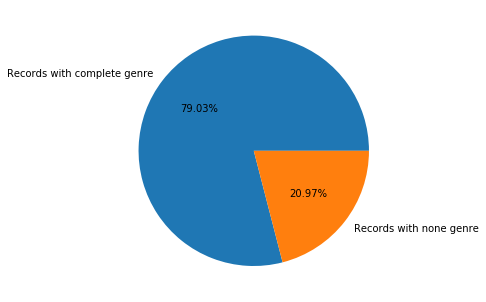

In [97]:
printPieChart(['Records with complete genre', 'Records with none genre'],
              [percentage_of_complete_genres, percentage_of_none_genres])

### description

In [140]:
descriptions = df.loc[:, ['name','description','release_date']]

In [141]:
descriptions

,name,description,release_date
0,Jail Breakers,[Jail Breakers is a crime fiction film directe...,1976-06-19
1,Kvelden er din,[None],2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,[Grandeur et decadence dun petit commerce de C...,1986
3,The Doors: Live in Europe (1968),[None],1991
4,Smert Tairova,[Smert Tairova is a 2003 film directed by Bori...,2003
...,...,...,...
339669,It's Not About the Shawerma,[None],None
339670,Ambrose's Lofty Perch,[None],None
339671,The Enchanted Spectacles,[None],None
339672,Mounting Tension,[None],None


In [142]:
num_of_all_descriptions = len(descriptions)

In [143]:
max_descriptions = descriptions.apply(lambda x: len(x['description']), axis=1)

In [144]:
max_descriptions.head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
dtype: int64

In [145]:
max_index_descriptions = max_descriptions[max_descriptions == max_descriptions.max()].index

In [146]:
max_index_descriptions

Int64Index([90563], dtype='int64')

In [148]:
descriptions.iloc[max_index_descriptions]

,name,description,release_date
90563,Where's Huddles?,Where's Huddles? is a Hanna-Barbera animated t...,1970-07-01


In [149]:
max_descriptions.max()

911

In [150]:
descriptions = descriptions.explode('description')

In [151]:
num_of_none_descriptions = len(descriptions[descriptions['description'] == "None"])

In [152]:
num_of_none_descriptions

88489

In [153]:
num_of_all_descriptions-num_of_none_descriptions

251185

In [154]:
percentage_of_none_descriptions = (num_of_all_descriptions/100)*num_of_none_descriptions

In [155]:
percentage_of_complete_descriptions = (num_of_all_descriptions/100)*(num_of_all_descriptions-num_of_none_descriptions) 

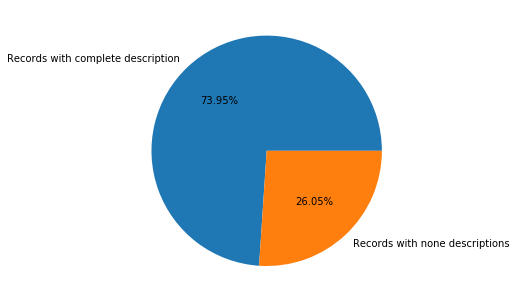

In [156]:
printPieChart(['Records with complete description', 'Records with none descriptions'],
              [percentage_of_complete_descriptions, percentage_of_none_descriptions])

### type

In [124]:
types = df.loc[:, ['name','type','release_date']]

In [125]:
types

,name,type,release_date
0,Jail Breakers,"[commontopic, film.film]",1976-06-19
1,Kvelden er din,"[common.topic, tv.tv_program]",2012-03-24
2,Grandeur et decadence dun petit commerce de Ci...,"[common.topic, film.film]",1986
3,The Doors: Live in Europe (1968),"[common.topic, film.film, media_common.netflix...",1991
4,Smert Tairova,"[award.award_nominated_work, award.award_winni...",2003
...,...,...,...
339669,It's Not About the Shawerma,"[common.topic, film.film]",None
339670,Ambrose's Lofty Perch,"[common.topic, film.film]",None
339671,The Enchanted Spectacles,"[common.topic, film.film]",None
339672,Mounting Tension,"[common.topic, film.film]",None


In [126]:
num_of_all_types = len(types)

In [127]:
max_types = types.apply(lambda x: len(x['type']), axis=1)

In [128]:
max_types.head(15)

0     2
1     2
2     2
3     3
4     4
5     3
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
dtype: int64

In [129]:
max_index_types = max_types[max_types == max_types.max()].index

In [130]:
max_index_types

Int64Index([60344], dtype='int64')

In [131]:
types.iloc[max_index_types]

,name,type,release_date
60344,Film,"[amusement_parks.ride_theme, award.award_disci...",1998-02-09


In [132]:
max_types.max()

28

In [133]:
types = types.explode('type')

In [134]:
types['type'].value_counts()[:]

common.topic                                  339373
film.film                                     269405
tv.tv_program                                  72695
media_common.netflix_title                     71301
award.award_nominated_work                     38643
                                               ...  
user.colleen16.default_domain.tragedy              1
user.jon.default_domain.my_favorite_things         1
digicams.camera_storage_type                       1
common.identity                                    1
music.music_video_performer                        1
Name: type, Length: 473, dtype: int64

In [135]:
num_of_film_types = len(types[types['type'] == 'film.film'])
num_of_tv_types = len(types[types['type'] == 'tv.tv_program'])

In [136]:
total_num_of_types = num_of_film_types + num_of_tv_types

In [137]:
num_of_both_types = total_num_of_types - num_of_all_types

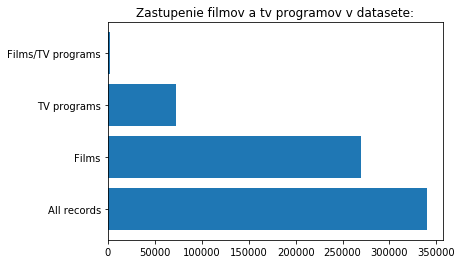

In [139]:
data = [num_of_all_types, num_of_film_types, num_of_tv_types, num_of_both_types]
plt.barh(["All records","Films","TV programs","Films/TV programs"], data)
plt.title('Zastupenie filmov a tv programov v datasete:')
plt.show()

### release_date

Lets see the oldest movie in our dataset:

In [157]:
df[df['release_date'] == df['release_date'].min()]

,name,aliases,genres,description,type,release_date
156470,The Downtime,[None],"[Drama Film, Short Film TV Program, Short Film...",[The Downtime is a short comedy drama film dir...,"[common.topic, film.film]",0214-02-28


In [158]:
df[(df['release_date'] > "2021") & (df['release_date'] != "None")]

,name,aliases,genres,description,type,release_date
13181,Russian Yeti: The Killer Lives,[None],"[Action TV Program, Adventure TV Program, Real...","[RUSSIAN YETI: THE KILLER LIVES, a 2-hour spec...","[common.topic, tv.tv_program]",2104-06-01
14405,Shivendra,[None],[None],[None],"[common.topic, film.film]",2034-02-23
20481,Janus: Two Faces of Desire,[카오스@ko],"[Thriller Film, Erotica Film, Romance Film, Ro...",[Janus: Two Faces of Desire is an erotica film...,"[common.topic, film.film]",2104-08-07
23845,Markurells I Wadköping,[None],"[TV Miniseries, TV Drama]",[None],"[common.topic, tv.tv_program]",2068-12-25
33635,Who The F**k Is Uncle Joe,[None],"[Short Film TV Program, Short Film, Romantic c...",[None],"[common.topic, film.film]",2103
306941,Chingchasawan,[Ching Cha Sawan@en],[TV Variety Show],[None],"[common.topic, tv.tv_program]",2547-11-06
321257,It is,[None],[None],[None],"[common.topic, film.film]",2222-01-02
339349,Blackout,[None],"[Short Film TV Program, Short Film, Historical...","[Blackout is a 2013 animated documentary, hist...","[common.topic, film.film]",2103-05-22


It seems that there are some inconsistent data from the freebase since the first recorded film was produced in the end of the 19th century and since to this date the year is 2020. We adjust the data so that we only view data that are past this from and past this date.

In [159]:
date_column = df[(df['release_date'] >= '1870') & (df['release_date'] <= "2020") & (df['release_date'] != "None")]['release_date']

In [160]:
date_column.min()

'1880'

In [161]:
date_column.max()

'2019-11-01'

In [162]:
date_column

0         1976-06-19
1         2012-03-24
2               1986
3               1991
4               2003
             ...    
339648    2013-02-23
339653    2013-11-29
339658    2013-12-05
339661    2013-06-28
339673          1976
Name: release_date, Length: 296369, dtype: object

In [163]:
date_column = pd.to_datetime(date_column)

In [164]:
date_column = date_column.map(lambda x: x.strftime('%Y'))

In [165]:
print(date_column)

0         1976
1         2012
2         1986
3         1991
4         2003
          ... 
339648    2013
339653    2013
339658    2013
339661    2013
339673    1976
Name: release_date, Length: 296369, dtype: object


In [168]:
date_column.value_counts()

2013    15842
2012    14253
2008    14068
2009    13274
2011    12814
        ...  
1889        2
1890        2
1880        1
1893        1
1888        1
Name: release_date, Length: 133, dtype: int64

In [169]:
date_column.value_counts().sort_index(ascending=False)[:40].to_frame()

,release_date
2019,4
2018,7
2017,19
2016,63
2015,1461
2014,9145
2013,15842
2012,14253
2011,12814
2010,12487


In [170]:
date_column.value_counts().sort_index(ascending=False)[40:80].to_frame()

,release_date
1979,2057
1978,1886
1977,1853
1976,1807
1975,1650
1974,1762
1973,1738
1972,1822
1971,1805
1970,1643


In [171]:
date_column.value_counts().sort_index(ascending=False)[80:].to_frame()

,release_date
1939,877
1938,879
1937,955
1936,965
1935,836
1934,813
1933,735
1932,704
1931,728
1930,644


In [181]:
nineteen_cent = len(df[(df['release_date'] >= '1880') & (df['release_date'] < "1901") & (df['release_date'] != "None")]['release_date'])
twenty_cent = len(df[(df['release_date'] >= '1901') & (df['release_date'] < "2001") & (df['release_date'] != "None")]['release_date'])
twentyone_cent = len(df[(df['release_date'] >= '2001') & (df['release_date'] < "2021") & (df['release_date'] != "None")]['release_date'])

In [ ]:
nineteen_cent_p = 

// toto treba este prerobit

In [180]:
printPieChart(['19. century', '20. century','21. century' ],
              [percentage_of_complete_descriptions, percentage_of_none_descriptions])

1880    1976
1881    2005
1882    1969
1883    1996
1884    2009
1885    2002
1886    2001
1887    1973
1888    1998
1889    2002
1891    2004
1892    1982
1893    1968
1894    2010
1895    2006
1896    2007
1897    2008
1898    1993
1899    1982
1900    2007
Name: release_date, dtype: object

## Indexing

In [120]:
myfile = open('data/data2/400gbJson.json', 'r',encoding='utf-8')
jsondata = myfile.read()
jsonobj = json.loads(jsondata)

In [121]:
jsondump = []
for i in range(0, len(jsonobj)):
    if(jsonobj[i]['release_date'] == "None"):
        jsonobj[i]['release_date'] = None
    if(jsonobj[i]['name'] != "" and jsonobj[i]['name'] != "None"):
        jsondump.append(json.dumps(jsonobj[i]))

In [122]:
type(jsondump)

list

In [123]:
len(jsondump)

339646

In [124]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200}], timeout=30, max_retries=10, retry_on_timeout=True)
helpers.bulk(es, jsondump, index='movie')

(339646, [])

In [125]:
#es.indices.delete(index='movie', ignore=[400, 404])

## Searching

### Search by name

Exact matching:

In [127]:
@interact(q = "")
def searchForName(q):
    searches = es.search(index="movie", body = {
        "query": {
            "match_phrase": {
                "name.keyword": q
            }
        }
    })
    return list(map(lambda x: x["_source"], searches["hits"]["hits"]))

interactive(children=(Text(value='', description='q'), Output()), _dom_classes=('widget-interact',))